In [1]:
from collections import Counter
import json
import matplotlib.pyplot as plt
import numpy as np
from os.path import exists
import pandas as pd
import random
import spacy
from typing import Tuple

In [2]:
if not exists("merged_dataset.csv"):
    raise Exception("merged_dataset.csv was not found")

In [3]:
dataset = pd.read_csv("merged_dataset.csv")
dataset

,Plot,General genre,Specific genre
0,The nation of Panem consists of a wealthy Capi...,Action,Science Fiction
1,Poovalli Induchoodan is sentenced for six yea...,Action,Musical
2,Seventh-day Adventist Church pastor Michael Ch...,Drama,Crime
3,"{{plot}} The film opens in 1974, as a young gi...",Thriller,Horror
4,Infuriated at being told to write one final co...,Monochrome,Romance
...,...,...,...
19105,While drinking alone one night and reminiscing...,Adventure,Science Fiction
19106,"{{Plot}} In an alternate universe, people are...",Thriller,Science Fiction
19107,Twenty-something Eun-mo listens to a taxi driv...,Drama,Romance
19108,"In 1928 Hollywood, director Leo Andreyev look...",Monochrome,War


In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
def get_parts_of_speech(plots: list) -> Tuple[Counter, Counter, Counter, Counter]:
    adjectives = Counter()
    adverbs = Counter()
    nouns = Counter()
    verbs = Counter()
    for plot in plots:
        tokens = nlp(plot)
        adjectives.update(Counter([token.lower_ for token in tokens if token.pos_ == "ADJ"]))
        adverbs.update(Counter([token.lower_ for token in tokens if token.pos_ == "ADV"]))
        nouns.update(Counter([token.lower_ for token in tokens if token.pos_ == "NOUN"]))
        verbs.update(Counter([token.lower_ for token in tokens if token.pos_ == "VERB"]))
    return adjectives, adverbs, nouns, verbs

In [6]:
def count_words(df: pd.DataFrame, genres: str) -> pd.DataFrame:
    df = df.groupby(genres).agg({"Plot": lambda x: list(x)})
    df["Adjectives"], df["Adverbs"], df["Nouns"], df["Verbs"] = zip(*df.apply(lambda x: get_parts_of_speech(x["Plot"]), axis=1))
    df.drop("Plot", axis=1, inplace=True)
    return df

In [7]:
def create_or_load_words(genres: str) -> pd.DataFrame:
    filename = "general_words.json" if genres == "General genre" else "specific_words.json"
    if exists(filename):
        with open(filename, 'r') as fp:
            df = pd.DataFrame(json.load(fp)).applymap(lambda x: Counter(x))
    else:
        df = count_words(dataset, genres)
        with open(filename, 'w') as fp:
            json.dump(df.to_dict(), fp)
    return df

In [8]:
general_words = create_or_load_words("General genre")
general_words

,Adjectives,Adverbs,Nouns,Verbs
Action,"{'wealthy': 116, 'poorer': 2, 'past': 61, 'ann...","{'once': 402, 'frequently': 23, 'intensively':...","{'nation': 30, 'districts': 3, 'punishment': 3...","{'consists': 15, 'provide': 67, 'selected': 24..."
Adventure,"{'philistine': 3, 'hunted': 2, 'heavy': 43, 'o...","{'back': 976, 'apart': 30, 'thus': 85, 'then':...","{'vows': 8, 'birth': 40, 'mother': 255, 'woman...","{'placed': 63, 'engaged': 20, 'named': 424, 'l..."
Animation,"{'complete': 39, 'most': 102, 'various': 107, ...","{'however': 902, 'so': 473, 'much': 101, 'actu...","{'plane': 140, 'golf': 12, 'agent': 36, 'stars...","{'trying': 269, 'get': 709, 'play': 90, 'flash..."
Documentary,"{'intelligent': 4, 'human': 26, 'potential': 4...","{'tantalisingly': 1, 'enough': 9, 'however': 3...","{'computer': 11, 'experts': 14, 'world': 58, '...","{'strive': 2, 'fashioning': 1, 'equal': 1, 'me..."
Drama,"{'seventh': 19, 'old': 2091, 'fellow': 328, 'c...","{'soon': 1770, 'too': 1007, 'widely': 16, 'eve...","{'day': 2826, 'pastor': 45, 'wife': 2537, 'son...","{'sleeping': 180, 'enjoying': 73, 'heard': 177..."
Family,"{'prone': 4, 'awkward': 16, 'nerdy': 8, 'old':...","{'often': 45, 'strangely': 8, 'everytime': 1, ...","{'allergy': 4, 'year': 352, 'girl': 318, 'woma...","{'forced': 161, 'bullied': 24, 'struggling': 3..."
Monochrome,"{'final': 160, 'fictional': 36, 'unemployed': ...","{'now': 541, 'incessantly': 3, 'far': 69, 'how...","{'column': 14, 'newspaper': 204, 'job': 404, '...","{'infuriated': 8, 'told': 158, 'write': 53, 'l..."
Short Film,"{'mexican': 1, 'high': 22, 'about': 24, 'third...","{'then': 380, 'never': 36, 'again': 107, 'thro...","{'widow': 2, 'letter': 6, 'school': 40, 'son':...","{'receives': 11, 'attended': 4, 'informs': 16,..."
Thriller,"{'young': 1045, 'bitter': 27, 'good': 244, 'fu...","{'outside': 276, 'forward': 57, 'closer': 36, ...","{'plot': 251, 'film': 1421, 'girl': 790, 'scho...","{'opens': 308, 'stands': 73, 'waiting': 208, '..."


In [9]:
specific_words = create_or_load_words("Specific genre")
specific_words

,Adjectives,Adverbs,Nouns,Verbs
Biography,"{'famous': 57, 'chilean': 4, 'small': 67, 'pol...","{'poorly': 9, 'eventually': 245, 'further': 35...","{'poet': 31, 'communist': 6, 'island': 30, 're...","{'exiled': 7, 'accompanies': 7, 'looks': 33, '..."
Comedy,"{'identical': 25, 'other': 1371, 'same': 458, ...","{'apart': 61, 'simultaneously': 17, 'rather': ...","{'sets': 13, 'triplets': 6, 'year': 464, 'brot...","{'play': 332, 'born': 72, 'lose': 142, 'unawar..."
Crime,"{'seventh': 7, 'old': 851, 'fellow': 181, 'cer...","{'soon': 792, 'too': 460, 'widely': 11, 'event...","{'day': 1062, 'pastor': 21, 'wife': 1439, 'son...","{'sleeping': 82, 'enjoying': 27, 'heard': 106,..."
Fantasy,"{'evil': 235, 'young': 548, 'good': 173, 'resp...","{'later': 785, 'now': 662, 'fully': 54, 'highl...","{'head': 253, 'prophecy': 57, 'children': 563,...","{'given': 185, 'said': 70, 'finds': 851, 'have..."
Horror,"{'young': 773, 'bitter': 8, 'good': 164, 'full...","{'outside': 295, 'forward': 39, 'closer': 28, ...","{'plot': 155, 'film': 1016, 'girl': 634, 'scho...","{'opens': 285, 'stands': 66, 'waiting': 136, '..."
Musical,"{'only': 193, 'idealist': 1, 'top': 37, 'civil...","{'earlier': 52, 'manapally': 3, 'actually': 15...","{'years': 436, 'prison': 111, 'life': 977, 'cl...","{'sentenced': 37, 'murdering': 16, 'framed': 1..."
Mystery,"{'innocent': 25, 'young': 190, 'many': 50, 'ha...","{'so': 133, 'even': 97, 'luckily': 5, 'just': ...","{'man': 343, 'job': 58, 'interview': 13, 'crim...","{'mistaken': 6, 'arrested': 50, 'cops': 1, 'mi..."
Romance,"{'final': 305, 'fictional': 32, 'unemployed': ...","{'now': 999, 'incessantly': 2, 'far': 113, 'ho...","{'column': 10, 'newspaper': 115, 'job': 810, '...","{'infuriated': 26, 'told': 295, 'write': 119, ..."
Science Fiction,"{'wealthy': 27, 'poorer': 2, 'past': 41, 'annu...","{'once': 166, 'frequently': 10, 'intensively':...","{'nation': 24, 'districts': 2, 'punishment': 8...","{'consists': 12, 'provide': 25, 'selected': 18..."
War,"{'american': 530, 'jewish': 134, 'british': 47...","{'as': 258, 'well': 235, 'anxiously': 9, 'prev...","{'film': 969, 'events': 98, 'ship': 330, 'foun...","{'based': 74, 'happened': 67, 'dealing': 13, '..."


In [10]:
specific_words["Adjectives"].map(lambda x: [*zip(*x.most_common(5))][0])

Biography                    (other, young, first, new, old)
Comedy                          (other, new, old, own, next)
Crime                         (other, young, new, dead, old)
Fantasy                        (other, new, young, old, own)
Horror                       (other, dead, old, young, next)
Musical                       (other, new, young, own, next)
Mystery                      (other, young, dead, next, own)
Romance                       (other, young, new, old, next)
Science Fiction              (other, new, human, own, first)
War                (german, other, american, british, young)
Name: Adjectives, dtype: object

In [11]:
def plot_most_common(df: pd.DataFrame, part_of_speech: str, genre: str, n: int) -> None:
    counter = df[part_of_speech][genre]
    mc = counter.most_common(n)
    mc.reverse()
    bars, width = zip(*mc)
    plt.rcParams["figure.facecolor"] = "white"
    plt.figure(figsize=(12,15))
    y_pos = np.arange(len(bars))
    plt.barh(y_pos, width)
    plt.yticks(y_pos, bars)
    x_min, x_max = plt.xlim()
    plt.xlim(x_min, x_max + 50)
    for i, v in enumerate(width):
        plt.text(v + 25, i, f"{v / sum(counter.values()):.2%}", ha="center", va="center")
    plt.title(f"{n} Most Common {part_of_speech} in {genre} Movies")
    plt.show()

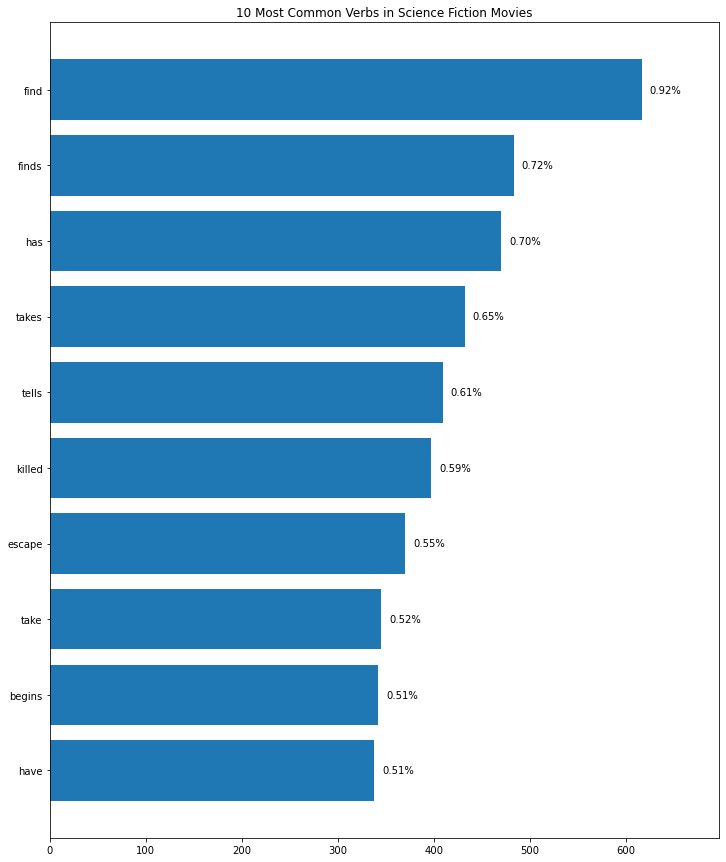

In [12]:
plot_most_common(specific_words, "Verbs", "Science Fiction", 10)

In [13]:
def create_typical_sentence(df: pd.DataFrame, genre: str, stop: int, start: int = 1) -> str:
    a, b = random.sample(range(start, stop + 1), 2)
    sub = df["Nouns"][genre].most_common(a)[-1][0]
    verb = df["Verbs"][genre].most_common(random.randint(start, stop))[-1][0]
    adverb = df["Adverbs"][genre].most_common(random.randint(start, stop))[-1][0]
    adjective = df["Adjectives"][genre].most_common(random.randint(start, stop))[-1][0]
    obj = df["Nouns"][genre].most_common(b)[-1][0]
    return f"{sub} {adverb} {verb} {adjective} {obj}"

In [41]:
create_typical_sentence(general_words, "Thriller", 50)

'killer apparently takes good murder'

In [15]:
def get_named_entities(plots: list) -> list:
    entities = []
    for plot in plots:
        tokens = nlp(plot)
        entities += [token.text.lower() for token in tokens.ents]
    return entities

In [16]:
def entities_from_plot(df: pd.DataFrame, genres: str) -> pd.DataFrame:
    df = df.groupby(genres).agg({"Plot": lambda x: list(x)})
    df["All entities"] = df["Plot"].apply(get_named_entities)
    df["Unique entities"] = df["All entities"].apply(lambda x: [*{*x}])
    df.drop("Plot", axis=1, inplace=True)
    return df

In [17]:
def create_or_load_entities(df: pd.DataFrame, genres: str) -> pd.DataFrame:
    filename = "general_entities.json" if genres == "General genre" else "specific_entities.json"
    if exists(filename):
        with open(filename, 'r') as fp:
            df = pd.DataFrame(json.load(fp))
    else:
        df = entities_from_plot(dataset, genres)
        with open(filename, 'w') as fp:
            json.dump(df.to_dict(), fp)
    return df

In [18]:
general_entities = create_or_load_entities(dataset, "General genre")
general_entities

,All entities,Unique entities
Action,"[panem, capitol, twelve, between the ages of 1...","[lowrey, mission damon, the continental army, ..."
Adventure,"[samson, hebrew, nazirite, philistine, semadar...","[dudley frank, johnny k. sherrypie, akivasha, ..."
Animation,"[daffy duck, sleepy lagoon, porky, daffy, pork...","[the sound of scooby, scooby, isao ota, elloe,..."
Documentary,"[raymond kurzweil, hiroshi ishiguro, joseph we...","[silvio, polish, 9 years, maurice chevalier's,..."
Drama,"[seventh-day, adventist church, michael chambe...","[angela barr, kaya, mun ki, hao-hao, sergeant ..."
Family,"[jordan sands, 17-year-old, ashley edwards, da...","[kumquat, nine months later, hamsalekha, marsh..."
Monochrome,"[one, ann mitchell, john doe, christmas eve, m...","[one-third, same day, a third world war, diane..."
Short Film,"[mexican, third, pentagon, pentagon, exorcist,...",[namehttp://www.mtv.com/news/articles/1650692/...
Thriller,"[1974, dahlia, 2005, dahlia, kyle, cecilia, ky...","[swiss-west german, robie, cabrini-green, jane..."


In [19]:
specific_entities = create_or_load_entities(dataset, "Specific genre")
specific_entities

,All entities,Unique entities
Biography,"[pablo neruda, chilean, italy, mario ruoppolo,...","[the jackson 5, nine months later, lillian rus..."
Comedy,"[stooges, three, one year, nine, world war ii,...","[squidward, caesar, ted marry -, curly sue, u...."
Crime,"[seventh-day, adventist church, michael chambe...","[kaya, lowrey, jerry fay, robie, sergeant matt..."
Fantasy,"[conqueror, clan, mud buddha, conqueror, two, ...","[david duncan, ethos, pathos, perkins, glum, n..."
Horror,"[1974, dahlia, 2005, dahlia, kyle, cecilia, ky...","[believing christine, nine months later, swiss..."
Musical,"[six years, induchoodan, karunakara menon, man...","[the jackson 5, barney sloan, lillian russell,..."
Mystery,"[vishwanathan, kochi, george kutty, vishwanath...","[the sound of scooby, scooby, george marries, ..."
Romance,"[one, ann mitchell, john doe, christmas eve, m...","[kumquat, angela barr, diane lovering, mun ki,..."
Science Fiction,"[panem, capitol, twelve, between the ages of 1...","[j.g. williams, isao ota, elloe, a third world..."
War,"[exodus, 1947, israel, 1948, fremont, american...","[one-third, nine months later, the underground..."


In [20]:
def plot_uniqueness() -> None:
    height = []
    bars = []
    for df in [general_entities, specific_entities]:
        df = df.apply(lambda x: len(x["All entities"]) / len(x["Unique entities"]), axis=1)
        height += [*df.values]
        bars += [*df.index]
    plt.rcParams["figure.facecolor"] = "white"
    plt.figure(figsize=(20,10))
    x_pos = np.arange(len(height))
    plt.bar(x_pos, height)
    plt.xticks(x_pos, bars, rotation="vertical")
    y_min, y_max = plt.ylim()
    plt.ylim(y_min, y_max + 0.5)
    for i, v in enumerate(height):
        plt.text(i, v + 0.25, f"{v:.2f}", ha="center", va="center")
    plt.title("Uniqueness of Named Entities")
    plt.show()

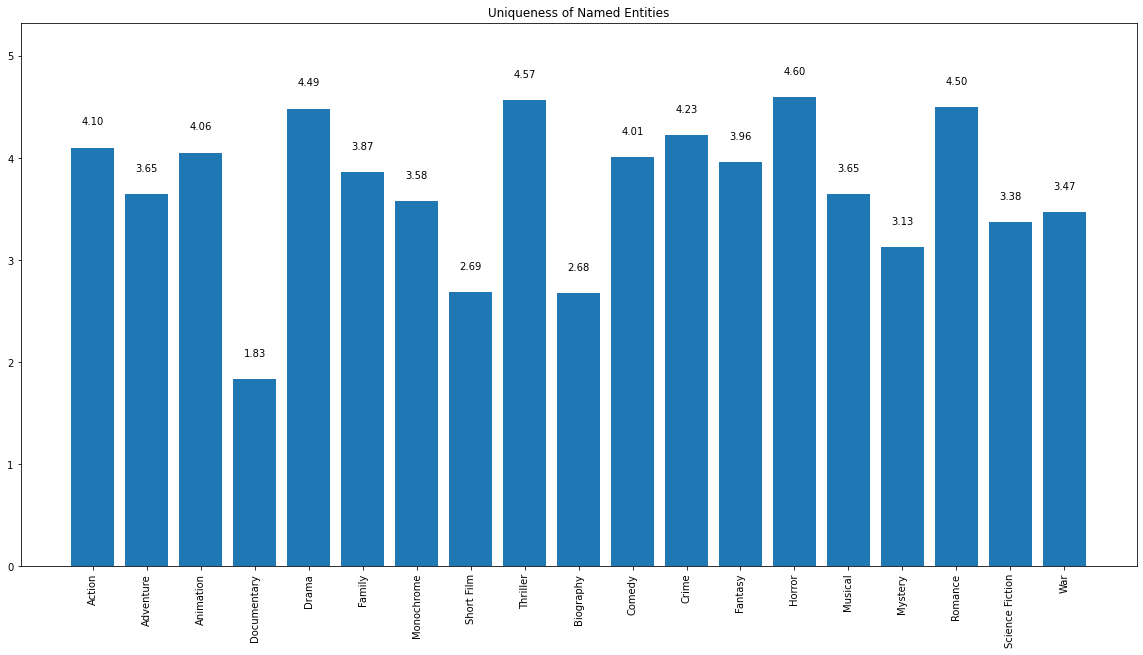

In [21]:
plot_uniqueness()